In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mid_salary_p = pd.read_csv("middle_salary_primary.csv")[["year", "mid salary, hryvnias"]]
popupation_p = pd.read_csv("population_info_primary.csv")[["year", "population (thousands)"]]
fertility_rate_p = pd.read_csv("fertility_rate_data_primary.csv")[["year", "fertility rate"]]

In [3]:
mid_salary_p

,year,"mid salary, hryvnias"
0,1996,125.23
1,1997,143.09
2,1998,152.83
3,1999,177.39
4,2000,231.04
5,2001,311.62
6,2002,375.98
7,2003,462.58
8,2004,590.53
9,2005,806.14


In [4]:
popupation_p

,year,population (thousands)
0,1990,51838.5
1,1991,51944.4
2,1992,52056.6
3,1993,52244.1
4,1994,52114.4
5,1995,51728.4
6,1996,51297.1
7,1997,50818.4
8,1998,50370.8
9,1999,49918.1


In [5]:
fertility_rate_p 

,year,fertility rate
0,1996,1.36
1,1997,1.27
2,1998,1.21
3,1999,1.13
4,2000,1.12
5,2001,1.08
6,2002,1.10
7,2003,1.17
8,2004,1.22
9,2005,1.21


Data primary preprocessing.

In [6]:
population = popupation_p[popupation_p["year"]>=1996]
population.head()

,year,population (thousands)
6,1996,51297.1
7,1997,50818.4
8,1998,50370.8
9,1999,49918.1
10,2000,49429.8


In [7]:
salaries = mid_salary_p["mid salary, hryvnias"].to_list()

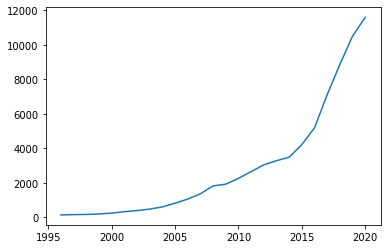

In [8]:
plt.plot(mid_salary_p["year"], mid_salary_p["mid salary, hryvnias"])
plt.show()

Now we try to predict mid salary in 2021 and 2022 years using parsed data.

In [9]:
n = len(salaries)
X = pd.DataFrame([ salaries[i:i+3] for i in range(n-3+1) ][1:])
y = pd.Series(salaries[3:])

In [10]:
X

,0,1,2
0,143.09,152.83,177.39
1,152.83,177.39,231.04
2,177.39,231.04,311.62
3,231.04,311.62,375.98
4,311.62,375.98,462.58
5,375.98,462.58,590.53
6,462.58,590.53,806.14
7,590.53,806.14,1042.88
8,806.14,1042.88,1352.75
9,1042.88,1352.75,1808.92


In [11]:
y

0       177.39
1       231.04
2       311.62
3       375.98
4       462.58
5       590.53
6       806.14
7      1042.88
8      1352.75
9      1808.92
10     1909.25
11     2246.75
12     2639.17
13     3031.92
14     3273.82
15     3474.75
16     4207.33
17     5187.33
18     7105.42
19     8867.33
20    10503.75
21    11596.60
dtype: float64

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
print(f"{len(X)}\n{len(y)}")

22
22


In [14]:
mlp_model = MLPRegressor((5, 25, 50, 75, 50, 25, 75, 50, 25, 5), activation="relu").fit(X, y)
pred = mlp_model.predict(X)
metrics.mean_squared_error(y, pred)

114140.41596419094

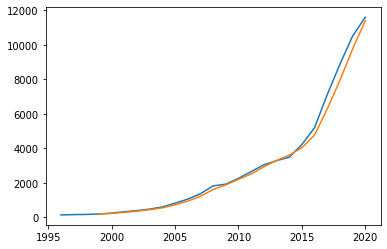

In [15]:
plt.plot(mid_salary_p["year"], mid_salary_p["mid salary, hryvnias"])
plt.plot(mid_salary_p["year"][3:], pred)
plt.show()

In [16]:
predict = mlp_model.predict(pd.DataFrame([ salaries[i:i+3] for i in range(n-3+1) ][-2:]))
predict

array([ 9754.07470567, 11392.45052026])

In [17]:
predict += abs(y.to_list()[-1]-pred.tolist()[-1])*np.ones(2)
predict

array([ 9958.22418541, 11596.6       ])

In [18]:
mid_salary = pd.DataFrame()
mid_salary["year"] = mid_salary_p["year"].to_list() + [2021, 2022]
mid_salary["mid salary, hryvnias"] = mid_salary_p["mid salary, hryvnias"].to_list() + [int(v*100)/100 for v in predict]
mid_salary

,year,"mid salary, hryvnias"
0,1996,125.23
1,1997,143.09
2,1998,152.83
3,1999,177.39
4,2000,231.04
5,2001,311.62
6,2002,375.98
7,2003,462.58
8,2004,590.53
9,2005,806.14


Here we will process population data

In [19]:
population.index = range(len(population))
population

,year,population (thousands)
0,1996,51297.1
1,1997,50818.4
2,1998,50370.8
3,1999,49918.1
4,2000,49429.8
5,2001,48923.2
6,2002,48457.1
7,2003,48003.5
8,2004,47622.4
9,2005,47280.8


In [20]:
mid_salary.to_csv("mid_salary.csv")
population.to_csv("population.csv")

Now we will process fertility rate data.

In [26]:
x = fertility_rate_p["fertility rate"].to_list()
X = pd.DataFrame([[x[i], x[i+1], x[i+2]] for i in range(len(x)-3)])
y = pd.Series(x[3:])

X

,0,1,2
0,1.36,1.27,1.21
1,1.27,1.21,1.13
2,1.21,1.13,1.12
3,1.13,1.12,1.08
4,1.12,1.08,1.10
5,1.08,1.10,1.17
6,1.10,1.17,1.22
7,1.17,1.22,1.21
8,1.22,1.21,1.31
9,1.21,1.31,1.35


In [25]:
y

0     1.13
1     1.12
2     1.08
3     1.10
4     1.17
5     1.22
6     1.21
7     1.31
8     1.35
9     1.46
10    1.47
11    1.44
12    1.46
13    1.53
14    1.51
15    1.50
16    1.51
17    1.47
18    1.37
19    1.30
20    1.23
21    1.22
22    1.20
dtype: float64

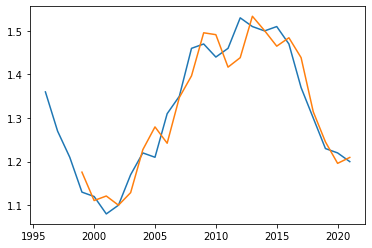

In [29]:
lr_model = LinearRegression().fit(X, y)
pred = lr_model.predict(X).tolist()

plt.plot(fertility_rate_p["year"], fertility_rate_p["fertility rate"])
plt.plot(fertility_rate_p["year"][3:], pred)

In [39]:
fert_2022 = lr_model.predict(pd.DataFrame(x[-3:]).T).tolist()
fert_2022

[1.2094833240781706]

In [41]:
fertility_rate = pd.DataFrame()
fertility_rate["year"] = fertility_rate_p["year"].to_list() + [2022]
fertility_rate["fertility rate"] = fertility_rate_p["fertility rate"].to_list() + [fert_2022[0]]
fertility_rate

,year,fertility rate
0,1996,1.360000
1,1997,1.270000
2,1998,1.210000
3,1999,1.130000
4,2000,1.120000
5,2001,1.080000
6,2002,1.100000
7,2003,1.170000
8,2004,1.220000
9,2005,1.210000


In [42]:
fertility_rate.to_csv("fertility_rate.csv")